In [1]:
#import neccesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import emoji
import collections
from collections import Counter
import re
from wordcloud import WordCloud
from nltk.util import ngrams

In [2]:
#read in dataset
df = pd.read_csv('final_dataframe.csv')
print(f"data has {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

data has 887160 rows and 4 columns


,raw_sentence,clean_sentence_training,clean_sentence_EDA,label
0,subsection retarded Hungarians Ohh boy brace l...,subsection retarded Hungarians Ohh boy brace l...,subsect retard hungarian ohh boy brace livid b...,0
1,yall hear sumn mean live small town rn work pe...,yall hear sumn mean live small town rn work pe...,yall hear sumn mean live small town rn work pe...,0
2,Japanese arent retarded know fictional charact...,Japanese arent retarded know fictional charact...,japanes arent retard know fiction charact aren...,1
3,might true didnt example whole segment US popu...,might true didnt example whole segment US popu...,true didnt exampl segment popul blind scream h...,1
4,point making fuss egg McMuffin ’ probably even...,point making fuss egg McMuffin ’ probably even...,point make fuss egg mcmuffin probabl real egg ...,0


In [3]:
#select only relevant columns
df_eda = df[['clean_sentence_EDA','label']]

In [4]:
#rename column for ease of use
df_eda = df_eda.rename(columns={'clean_sentence_EDA':'text'})

In [5]:
#distribution of data for the label categories
(df_eda['label'].value_counts(normalize=True))*100

0    74.636931
1    17.570337
2     7.792732
Name: label, dtype: float64

### GENERAL EDA

In [6]:
#function to process the count of the tweets
def create_word_counts(df):
    """
    Creates features based on the words

    Input
    ------
    df : pandas dataframe
           dataframe of all the data
    Returns
    -------
    df: pandas dataframe
        dataframe containing the various word features
    """
    df['text']=df['text'].astype(str)
    df['word_count'] = df['text'].apply(lambda x : len(x.split()))
    df['character_count'] = df['text'].apply(lambda x : len(x.replace(" ","")))
    df['word_density'] = df['word_count'] / (df['character_count'] + 1)
    return df

In [7]:
df_eda = create_word_counts(df_eda)

In [8]:
df_eda['word_count'].describe()

count    887160.000000
mean         22.994370
std          44.782651
min           1.000000
25%           5.000000
50%          10.000000
75%          22.000000
max        2341.000000
Name: word_count, dtype: float64

In [9]:
df_eda['character_count'].describe()

count    887160.000000
mean        124.408012
std         247.936013
min           1.000000
25%          28.000000
50%          53.000000
75%         120.000000
max        8187.000000
Name: character_count, dtype: float64

In [10]:
df_eda['word_count'].describe()

count    887160.000000
mean         22.994370
std          44.782651
min           1.000000
25%           5.000000
50%          10.000000
75%          22.000000
max        2341.000000
Name: word_count, dtype: float64

In [11]:
#univariate analysis of counts of words and characters
total_num_words = np.sum(df_eda['word_count'])
total_num_characters = np.max(df_eda['character_count'])
total_num_unique_words = len(np.unique(df_eda['word_count']))
total_num_unique_characters = len(np.unique(df_eda['character_count']))
average_length_of_words = np.mean(df_eda['word_count'])
average_length_of_characters = np.mean(df_eda['character_count'])


print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Total number of characters in the dataset: {total_num_characters} characters.')
print(f'Total number of unique words in the dataset: {total_num_unique_words} words.')
print(f'Total number of unique characters in the dataset: {total_num_unique_characters} characters.')
print(f'Average number of words in the dataset: {average_length_of_words} words.')
print(f'Average number of characters in the dataset: {average_length_of_characters} characters.')

Total number of words in the dataset: 20399685 words.
Total number of characters in the dataset: 8187 characters.
Total number of unique words in the dataset: 806 words.
Total number of unique characters in the dataset: 3016 characters.
Average number of words in the dataset: 22.99436967401596 words.
Average number of characters in the dataset: 124.40801208350241 characters.


In [12]:
#tokenize the texts
words = [word_tokenize(str(sentence)) for sentence in df_eda['text']]

In [13]:
#flatten the list to obtain single list
word = [item for word in words for item in word]

In [14]:
#function to check for emojis
def extract_emojis(s):
    """Checks if there are any emojis present

    Args:
        s (pandas series): column containing the texts
    Returns:
        result (list) : list containing emoji values if present, if not, empty string
    """    
    result= ''.join(c for c in s if c in emoji.EMOJI_DATA)
    return result

In [15]:
# 25 most common words
most_common = Counter(word).most_common(25)
print(most_common)

[('articl', 236448), ('page', 182700), ('like', 154515), ('wikipedia', 135041), ('edit', 131220), ('talk', 116368), ('peopl', 109306), ('think', 95543), ('fuck', 90513), ('know', 89270), ('delet', 86942), ('thank', 84521), ('time', 80526), ('sourc', 75402), ('want', 70348), ('use', 68732), ('need', 67218), ('n', 64366), ('look', 63238), ('im', 60986), ('good', 56873), ('person', 56147), ('work', 55317), ('user', 51690), ('u', 50962)]


In [16]:
#extract the word and the frequence count
words = [word for word, count in most_common]
frequency = [count for word, count in most_common]

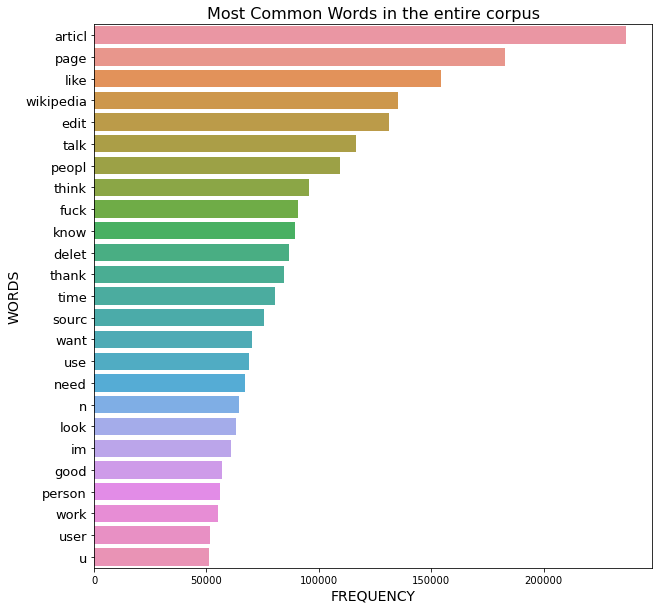

In [17]:
#plot the 25 most common words 
plt.figure(figsize=(10,10))
plt.title("Most Common Words in the entire corpus",fontsize=16)
plt.ylabel('WORDS',fontsize=14)
plt.xlabel('FREQUENCY',fontsize=14)
plt.yticks(fontsize=13)
sns.barplot(x = frequency, y = words);

#### There are some words or even word that dont make much sense, like u and n, and needs to be removed

In [19]:
#tokenize, flatten the list, remove all words less than 3 letters and find the 25 most common
words = [word_tokenize(str(sentence)) for sentence in df_eda['text']]
words_list = [item for word in words for item in word]
words_clean = [word for word in words_list if len(word)>=3]
most_common = Counter(words_clean).most_common(25)

In [20]:
# 25 most common words now
most_common = Counter(words_clean).most_common(25)

In [21]:
#extract the word and the frequence count
words = [word for word, count in most_common]
frequency = [count for word, count in most_common]

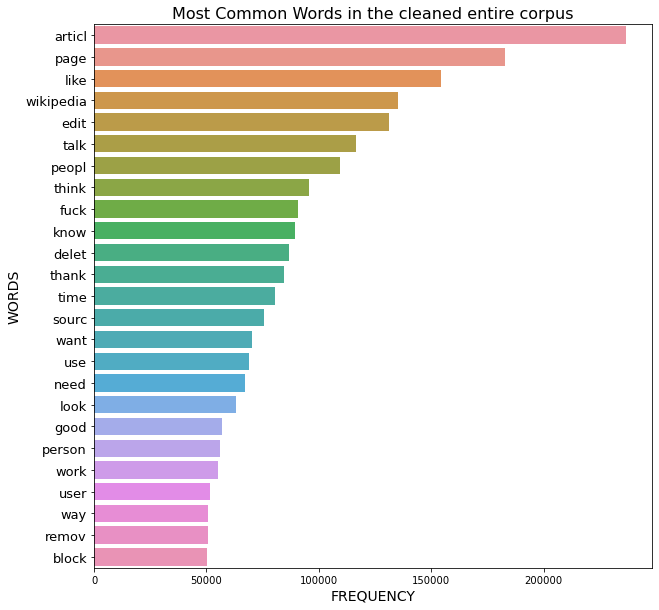

In [22]:
#plot the 25 most common words with words less than 3 letters removed
plt.figure(figsize=(10,10))
plt.title("Most Common Words in the cleaned entire corpus",fontsize=16)
plt.ylabel('WORDS',fontsize=14)
plt.xlabel('FREQUENCY',fontsize=14)
plt.yticks(fontsize=13)
sns.barplot(x = frequency, y = words);

### Label Partition EDA

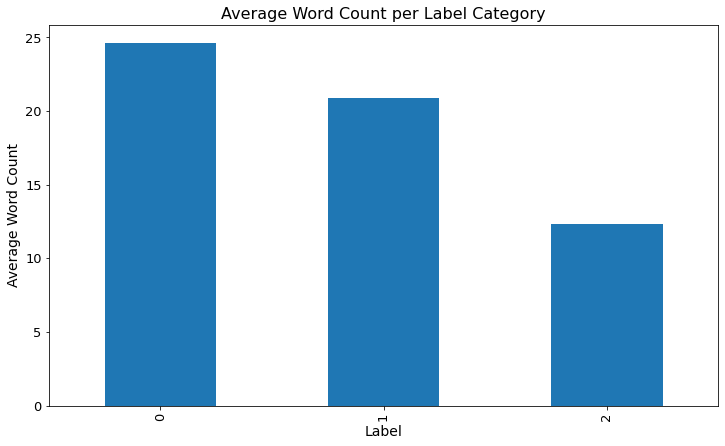

In [23]:
#plot the average number of words for each label category
plt.figure(figsize=(12,7))
df_eda.groupby('label')['word_count'].mean().plot(kind='bar')
plt.title("Average Word Count per Label Category",fontsize=16)
plt.xlabel('Label',fontsize=14)
plt.ylabel('Average Word Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

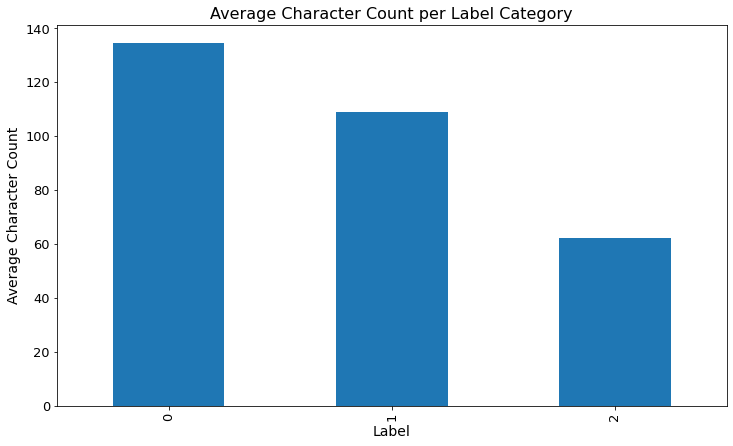

In [24]:
#plot the average number of characters for each label category
plt.figure(figsize=(12,7))
df_eda.groupby('label')['character_count'].mean().plot(kind='bar')
plt.title("Average Character Count per Label Category",fontsize=16)
plt.xlabel('Label',fontsize=14)
plt.ylabel('Average Character Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

#### There seems to some signal that shows that the more risky a text is, the lesser number of words or characters used.
#### There seems to be a very significant difference between the number of words or characters used in a risky text compared to a non risky text, with an average difference of about 66% for number of words, and 73% difference for number of characters
#### One reason i can see for this is that, usually when people are saying offensive or hateful stuff, they tend to focus on the hateful or offensive words, so they say very little and add very little context, leading to fewer words
#### Its possible if the model sees this pattern also, it can just output a prediction of risky for any text that has shorter number of words or characters, and output non risky, for any text that has a lot of words or characters
#### This could be a reason to reduce the dataset, whereby non risky texts that are less than a certain number of words(similar number to risky texts) are kept, and the ones that have huge number of words are removed.

In [25]:
#create individual dataset for each of the categories
non_risky = df_eda[df_eda['label'] == 0]
potentially_risky = df_eda[df_eda['label'] == 1]
risky = df_eda[df_eda['label'] == 2]

In [26]:
#apply the create word counts function to each of the datasets
non_risky = create_word_counts(non_risky)
potentially_risky = create_word_counts(potentially_risky)
risky = create_word_counts(risky)

/var/folders/84/bchpv7r54qlc22v70ncfhg7c0000gn/T/ipykernel_45053/2723092188.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].astype(str)
/var/folders/84/bchpv7r54qlc22v70ncfhg7c0000gn/T/ipykernel_45053/2723092188.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].apply(lambda x : len(x.split()))
/var/folders/84/bchpv7r54qlc22v70ncfhg7c0000gn/T/ipykernel_45053/2723092188.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [27]:
#checking the number of unique words for each dataset
print(f"There are {len(np.unique(non_risky['word_count']))} unique words in the non-risky texts category")
print(f"There are {len(np.unique(potentially_risky['word_count']))} unique words in the potential risky texts category")
print(f"There are {len(np.unique(risky['word_count']))} unique words in the risky texts category")

There are 732 unique words in the non-risky texts category
There are 619 unique words in the potential risky texts category
There are 297 unique words in the risky texts category


#### Looking at unique words also, the same pattern can be observed here, as there are more unique words in the risky category than the non unique ones

In [28]:
non_risky['word_count'].describe()

count    662149.000000
mean         24.605101
std          45.289486
min           1.000000
25%           6.000000
50%          11.000000
75%          24.000000
max        2341.000000
Name: word_count, dtype: float64

In [29]:
potentially_risky['word_count'].describe()

count    155877.000000
mean         20.893467
std          48.585911
min           1.000000
25%           5.000000
50%          10.000000
75%          20.000000
max        2048.000000
Name: word_count, dtype: float64

In [30]:
risky['word_count'].describe()

count    69134.000000
mean        12.304091
std         24.870623
min          1.000000
25%          4.000000
50%          8.000000
75%         14.000000
max       1250.000000
Name: word_count, dtype: float64

In [31]:
#creating new column containing the name of the dataframe itself to be used later 
non_risky = non_risky.assign(df_name = lambda x:'Non_Risky')
potentially_risky = potentially_risky.assign(df_name = lambda x:'Potentially_Risky')
risky = risky.assign(df_name = lambda x:'Risky')

In [32]:
#removing unneccesary column
non_risky = non_risky.reset_index().drop(columns='index')
risky = risky.reset_index().drop(columns='index')
potentially_risky = potentially_risky.reset_index().drop(columns='index')

In [33]:
#function to create ngrams
def extract_ngrams(data, num):
    """
    Extracts the ngrams from the corpus

    Input
    ------
    data : pandas dataframe
           dataframe of specified label category
    num : int
          number of ngrams(1 for unigram, 2 for bigram etc)
    Returns
    -------
    list of ngrams : list
        list containing the ngrams
    """
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

In [74]:
#function to plot the 20 most common unigrams
def plot_unigram(df):
    """
    Plots the 20 most common unigram of the specified label category dataset

    Input
    ------
    df : pandas dataframe
           dataframe of specified label category
    Returns
    -------
    None
    """
    texts = df['text']
    #apply the extract ngram function
    unigrams = [extract_ngrams(i,1) for i in texts]
    #flatten the list to get the unigram list
    unigram_list = [item for uni in unigrams for item in uni]
    #tokenize each word in the unigram list
    words = [word_tokenize(str(sentence)) for sentence in unigram_list]
    #flatten the list
    words_list = [item for word in words for item in word]
    #select only words with more than 3 letters
    words_clean = [word for word in words_list if len(word)>=3]
    #find 20 most common words
    unigram_most_common = collections.Counter(words_clean).most_common(20)
    words = [''.join(unigram) for unigram, counts in unigram_most_common]
    # get the counts
    counts = [counts for unigram, counts in unigram_most_common]
    counts.sort()
    plt.figure(figsize=(9,8))
    plt.barh(words, counts, color='blue')
    plt.title(f"20 most common Unigram words in Category {df['df_name'][0]}",fontsize=16)
    plt.xlabel('Counts',fontsize=15)
    plt.ylabel('Common Words',fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=14)
    plt.show();

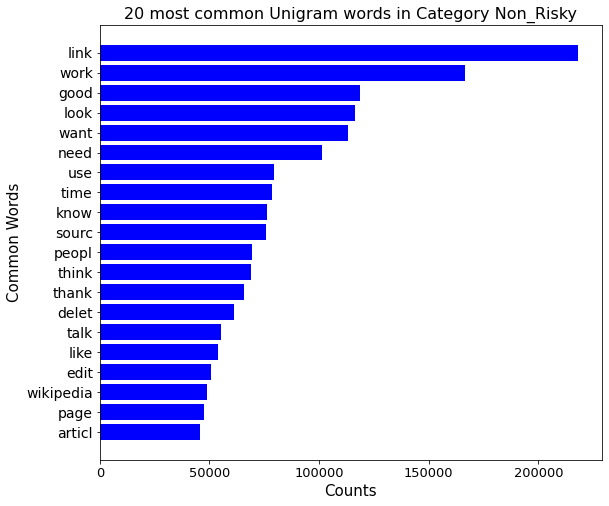

In [78]:
plot_unigram(non_risky)

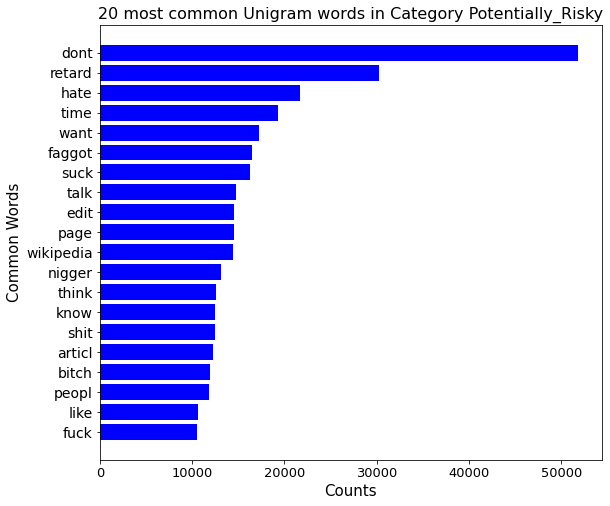

In [77]:
plot_unigram(potentially_risky)

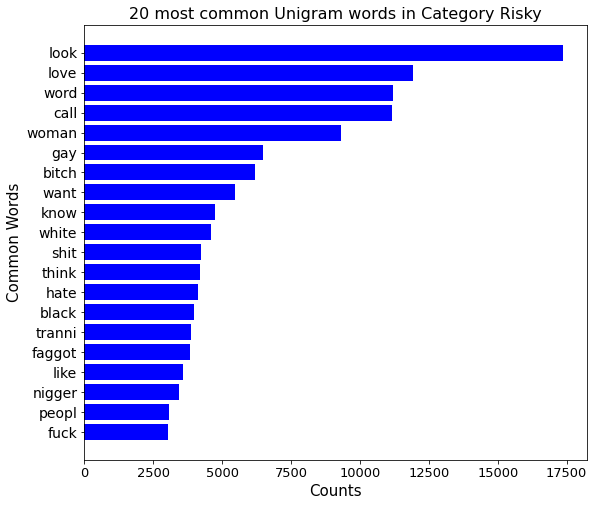

In [76]:
plot_unigram(risky)

In [38]:
def plot_bigram(df):
    """
    Plots the 20 most common bigram of the specified label category dataset

    Input
    ------
    df : pandas dataframe
           dataframe of specified label category
    Returns
    -------
    None
    """
    texts = df['text']
    #apply the extract ngram function
    bigrams = [extract_ngrams(i,2) for i in texts]
    #flatten the list to get the bigram list
    bigram_list = [item for uni in bigrams for item in uni]
    #find 20 most common words
    bigram_most_common = collections.Counter(bigram_list).most_common(20)
    words = [''.join(bigram) for bigram, counts in bigram_most_common]
    # get the counts
    counts = [counts for bigram, counts in bigram_most_common]
    counts.sort()
    plt.figure(figsize=(9,8))
    plt.barh(words, counts, color='blue')
    
    plt.title(f"20 most common Bigram words in Category {df['df_name'][0]}",fontsize=16)
    plt.xlabel('Counts',fontsize=15)
    plt.ylabel('Common Words',fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=14)
    plt.show();

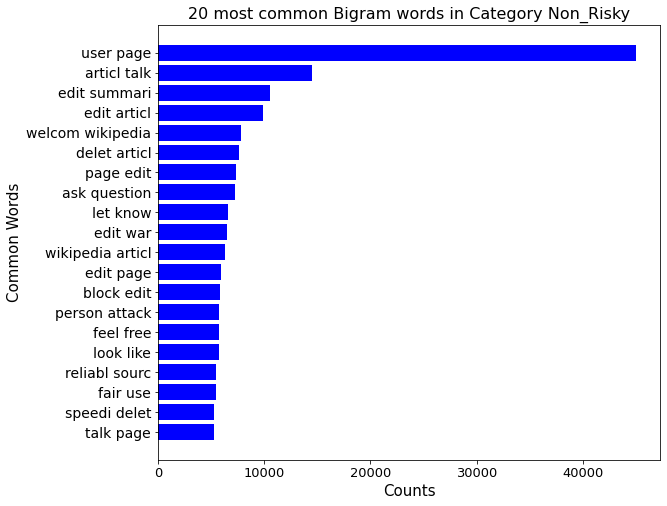

In [39]:
plot_bigram(non_risky)

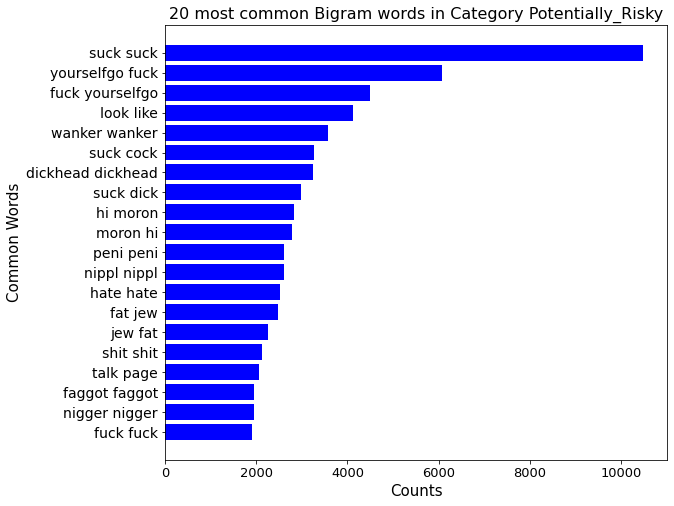

In [40]:
plot_bigram(potentially_risky)

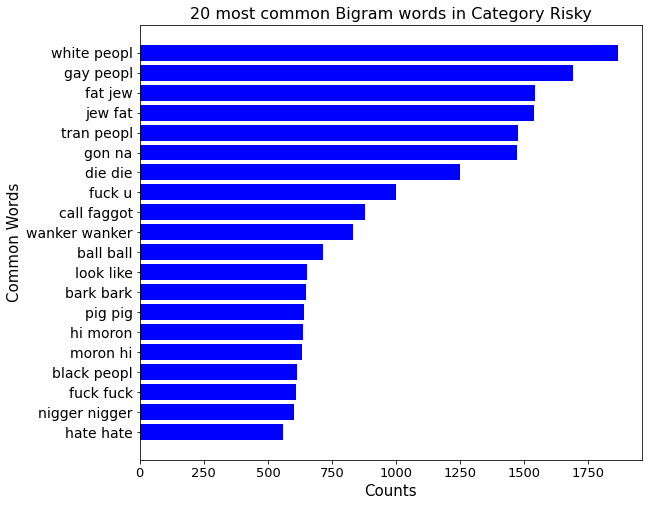

In [41]:
plot_bigram(risky)

In [42]:
def plot_trigram(df):
    """
    Plots the 20 most common trigram of the specified label category dataset

    Input
    ------
    df : pandas dataframe
           dataframe of specified label category
    Returns
    -------
    None
    """
    texts = df['text']
    #apply the extract ngram function
    trigrams = [extract_ngrams(i,3) for i in texts]
    #flatten the list to get the bigram list
    trigram_list = [item for uni in trigrams for item in uni]
    #find 20 most common words
    trigram_most_common = collections.Counter(trigram_list).most_common(20)
    words = [''.join(trigram) for trigram, counts in trigram_most_common]
    # get the counts
    counts = [counts for trigram, counts in trigram_most_common]
    counts.sort()
    plt.figure(figsize=(9,8))
    plt.barh(words, counts, color='blue')
    plt.title(f"20 most common Trigram words in Category {df['df_name'][0]}",fontsize=16)
    plt.xlabel('Counts',fontsize=15)
    plt.ylabel('Common Words',fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=14)
    plt.show();

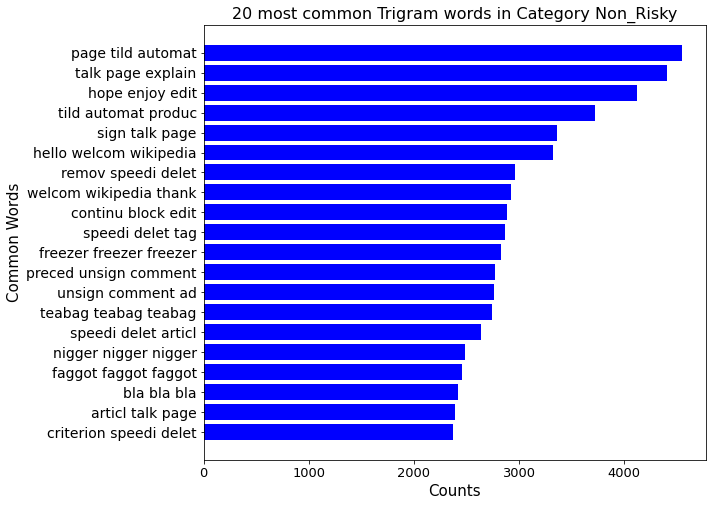

In [43]:
plot_trigram(non_risky)

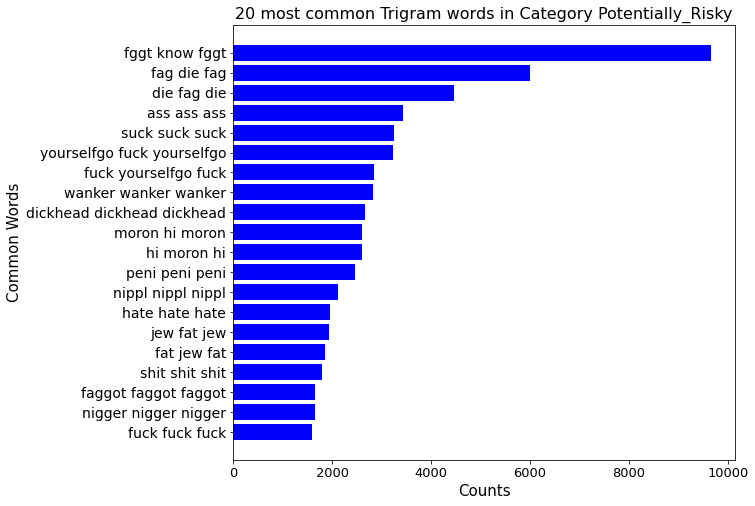

In [44]:
 plot_trigram(potentially_risky)

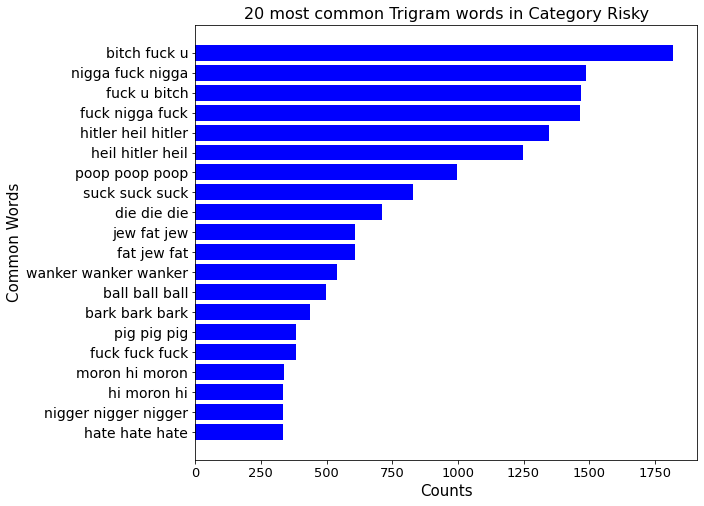

In [45]:
plot_trigram(risky)

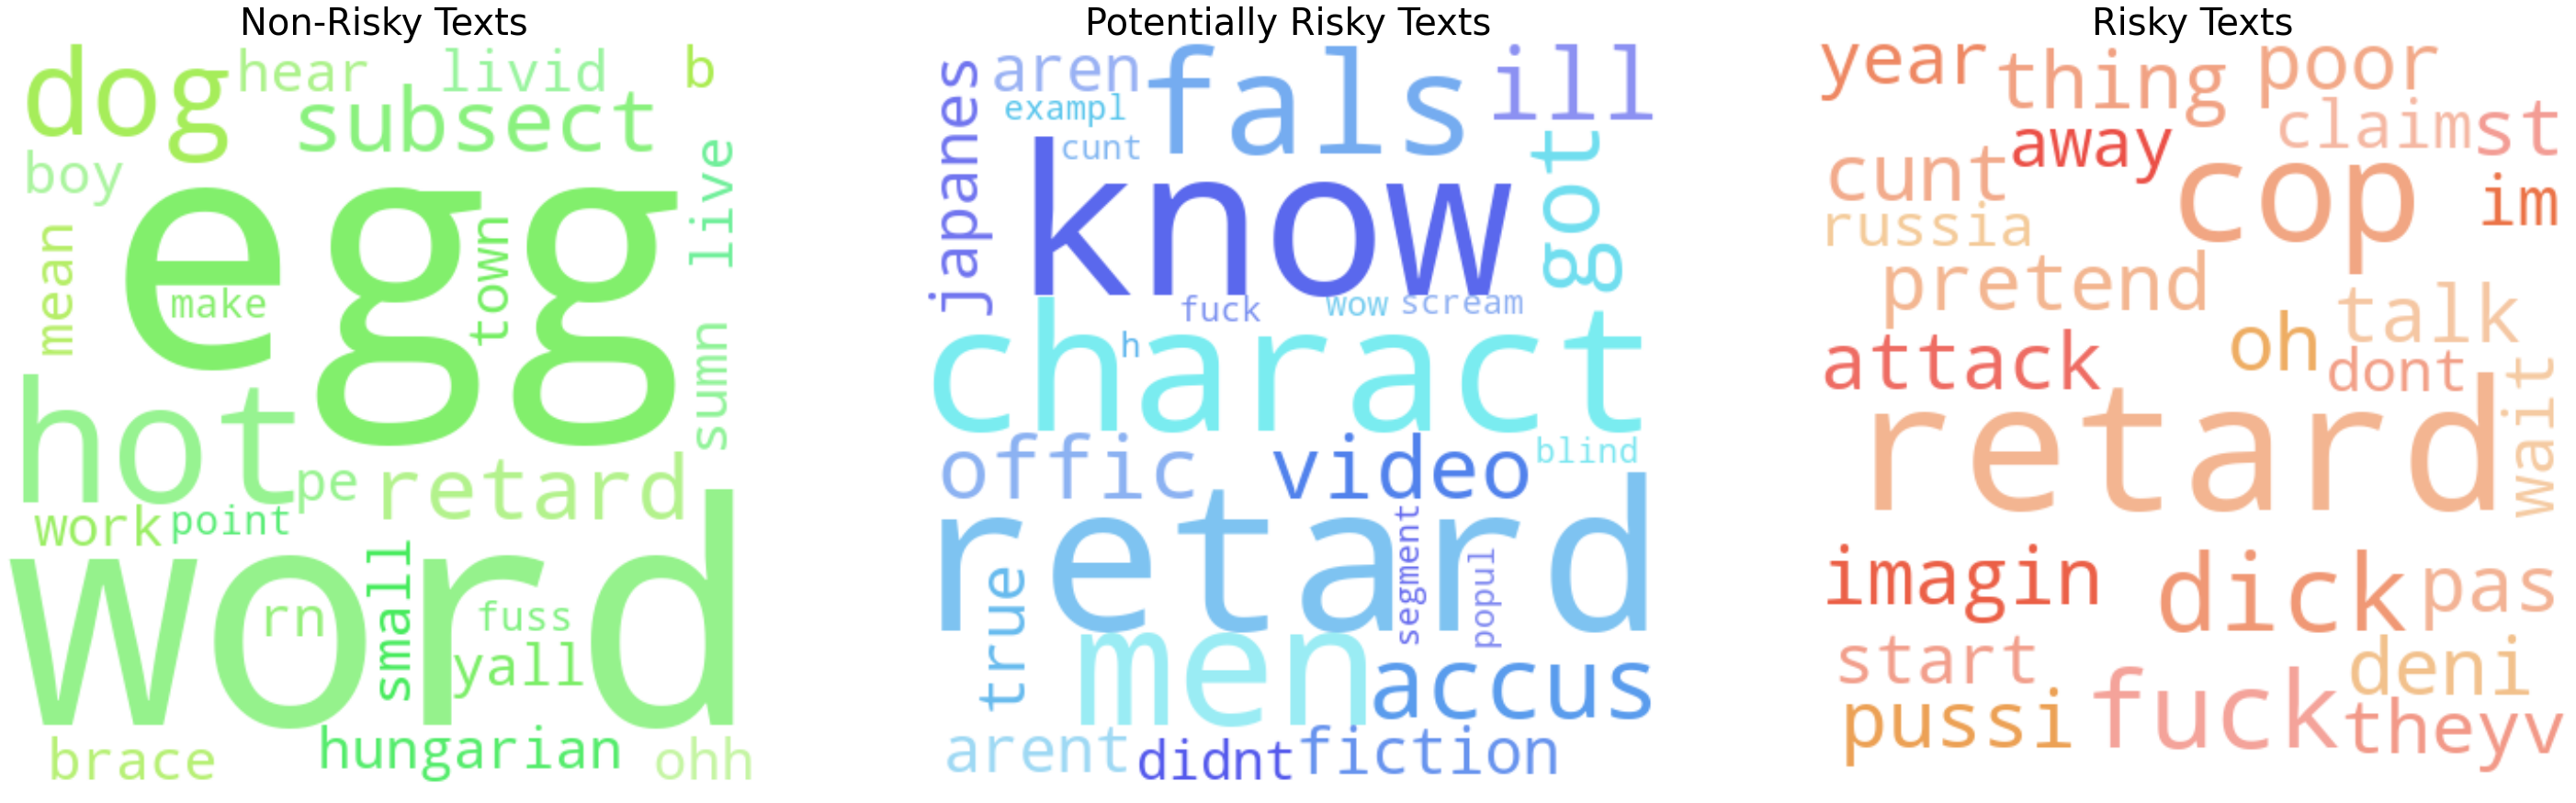

In [66]:
import random
#creating the wordcloud of non risky, potentially risky and risky texts
def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))

def blue_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(180, 240), random.randint(60, 80))
    
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=[50, 35])
#word cloud for non risky
wordcloud1 = WordCloud(background_color='white', height=400,max_words=25).generate((str(non_risky['text'][:10])))
ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax1.set_title('Non-Risky Texts', fontsize=40);
#word cloud for potentially risky
wordcloud2 = WordCloud(background_color='white', height=400,max_words=25).generate((str(potentially_risky['text'][:10])))
ax2.imshow(wordcloud2.recolor(color_func=blue_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
ax2.set_title('Potentially Risky Texts', fontsize=40);
#word cloud for Risky
wordcloud3 = WordCloud(background_color='white', height=400,max_words=25).generate((str(risky['text'][:10])))
ax3.imshow(wordcloud3.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax3.axis('off');
ax3.set_title('Risky Texts', fontsize=40);